In [204]:
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library(vegan)
library("lubridate")
library('PCAtools')
library("DESeq2")

In [23]:
#load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_treatment_4_analysis.RData")
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_counts_4_analysis.RData")
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_taxo_4_analysis.RData")


In [205]:
meta = read.csv ("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_combo_meta.csv",
row.names=1, header = T)%>%
  mutate(
    Month = factor(Month, levels = month.name)
  ) %>%
  arrange(Month) %>%
arrange(collection_date)

make_numeric <- data[252:321]

In [134]:
head(meta, n=2)

,sample_ID,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,⋯,colour_timepoint_reef,cluster_latitude,cluster_longitude,cluster_depth,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-584,apal_pr_gCN2_cl75_fr3_AH_2019-03-01,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,3,⋯,orangered,24.98454,-80.41658,15.7,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825
bagnumber-590,apal_pr_gCN2_cl79_fr3_AH_2019-03-01,1-Mar-19,5.331549,147.0395,-1.81184,-0.7369632,26.09619,pr,CN2,3,⋯,orangered,24.98455,-80.41659,16.7,24.985,-80.416,0.3999531,0.163012,25.99442,0.2483825


In [206]:
## Need taxonomy and counts as matrices
taxo_mat <- as.matrix(POR_taxo_4_analysis)
count_mat <- as.matrix(POR_counts_4_analysis)

In [207]:
ASV <- otu_table(as.matrix(POR_counts_4_analysis), 
                 taxa_are_rows = T)
TAX <- tax_table(as.matrix(POR_taxo_4_analysis))
SAMP <- sample_data(meta)

ps <- phyloseq(ASV, TAX, SAMP)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 27534 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 50 sample variables ]
tax_table()   Taxonomy Table:    [ 27534 taxa by 7 taxonomic ranks ]

In [208]:
microbiome::summarize_phyloseq(ps)

Compositional = NO2

1] Min. number of reads = 8182] Max. number of reads = 3300333] Total number of reads = 240649454] Average number of reads = 66294.61432506895] Median number of reads = 491797] Sparsity = 0.9856499982691076] Any OTU sum to 1 or less? YES8] Number of singletons = 679] Percent of OTUs that are singletons 
        (i.e. exactly one read detected across all samples)0.14527493281034410] Number of sample variables are: 50sample_IDcollection_dateSpeed.cm.s.Bearing.degrees.Velocity.N.cm.s.Velocity.E.cm.s.Temperature.C.reefGenotypeFragment_numberFragment_numdayYearSurvey.LiveFragLWHAdjusted.AreaS01FragCountSi.uM.NO2.uM.N.N.uM.NO3.uM.PO4.uM.sample_ID2HealthMonthSamp_tripjoining_infoorderspeciestime_ReefClustersampling_tripXcolour_reefcolour_genotypecolour_reef_genotypecolour_timepointcolour_timepoint_reefcluster_latitudecluster_longitudecluster_depthLat_decimalLong_decimalavgchla_mgm.3sdchla_mgm.3avgSST_degCsdSST_degC2



[[1]]
[1] "1] Min. number of reads = 818"

[[2]]
[1] "2] Max. number of reads = 330033"

[[3]]
[1] "3] Total number of reads = 24064945"

[[4]]
[1] "4] Average number of reads = 66294.6143250689"

[[5]]
[1] "5] Median number of reads = 49179"

[[6]]
[1] "7] Sparsity = 0.985649998269107"

[[7]]
[1] "6] Any OTU sum to 1 or less? YES"

[[8]]
[1] "8] Number of singletons = 67"

[[9]]
[1] "9] Percent of OTUs that are singletons \n        (i.e. exactly one read detected across all samples)0.145274932810344"

[[10]]
[1] "10] Number of sample variables are: 50"

[[11]]
 [1] "sample_ID"             "collection_date"       "Speed.cm.s."          
 [4] "Bearing.degrees."      "Velocity.N.cm.s."      "Velocity.E.cm.s."     
 [7] "Temperature.C."        "reef"                  "Genotype"             
[10] "Fragment_number"       "Fragment_num"          "day"                  
[13] "Year"                  "Survey."               "LiveFrag"             
[16] "L"                     "W"                     "H"                    
[19] "Adjusted.Area"         "S01FragCount"          "Si.uM."               
[22] "NO2.uM."               "N.N.uM."               "NO3.uM."              
[25] "PO4.uM."               "sample_ID2"            "Health"               
[28] "Month"                 "Samp_trip"             "joining_info"         
[31] "order"                 "species"               "time_Reef"            
[34] "Cluster"               "sampling_trip"         "X"                    
[37] "colour_reef"           "colour_genotype"       "colour_reef_genotype" 
[40] "colour_timepoint"      "colour_timepoint_reef" "cluster_latitude"     
[43] "cluster_longitude"     "cluster_depth"         "Lat_decimal"          
[46] "Long_decimal"          "avgchla_mgm.3"         "sdchla_mgm.3"         
[49] "avgSST_degC"           "sdSST_degC"

In [209]:
ps_fill = filter_taxa(ps, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 377 taxa and 363 samples ]
sample_data() Sample Data:       [ 363 samples by 50 sample variables ]
tax_table()   Taxonomy Table:    [ 377 taxa by 7 taxonomic ranks ]

In [210]:
microbiome::summarize_phyloseq(ps_fill)

Compositional = NO2

1] Min. number of reads = 7842] Max. number of reads = 3218573] Total number of reads = 207244414] Average number of reads = 57092.12396694215] Median number of reads = 422127] Sparsity = 0.6529217908528256] Any OTU sum to 1 or less? NO8] Number of singletons = 09] Percent of OTUs that are singletons 
        (i.e. exactly one read detected across all samples)010] Number of sample variables are: 50sample_IDcollection_dateSpeed.cm.s.Bearing.degrees.Velocity.N.cm.s.Velocity.E.cm.s.Temperature.C.reefGenotypeFragment_numberFragment_numdayYearSurvey.LiveFragLWHAdjusted.AreaS01FragCountSi.uM.NO2.uM.N.N.uM.NO3.uM.PO4.uM.sample_ID2HealthMonthSamp_tripjoining_infoorderspeciestime_ReefClustersampling_tripXcolour_reefcolour_genotypecolour_reef_genotypecolour_timepointcolour_timepoint_reefcluster_latitudecluster_longitudecluster_depthLat_decimalLong_decimalavgchla_mgm.3sdchla_mgm.3avgSST_degCsdSST_degC2



[[1]]
[1] "1] Min. number of reads = 784"

[[2]]
[1] "2] Max. number of reads = 321857"

[[3]]
[1] "3] Total number of reads = 20724441"

[[4]]
[1] "4] Average number of reads = 57092.1239669421"

[[5]]
[1] "5] Median number of reads = 42212"

[[6]]
[1] "7] Sparsity = 0.652921790852825"

[[7]]
[1] "6] Any OTU sum to 1 or less? NO"

[[8]]
[1] "8] Number of singletons = 0"

[[9]]
[1] "9] Percent of OTUs that are singletons \n        (i.e. exactly one read detected across all samples)0"

[[10]]
[1] "10] Number of sample variables are: 50"

[[11]]
 [1] "sample_ID"             "collection_date"       "Speed.cm.s."          
 [4] "Bearing.degrees."      "Velocity.N.cm.s."      "Velocity.E.cm.s."     
 [7] "Temperature.C."        "reef"                  "Genotype"             
[10] "Fragment_number"       "Fragment_num"          "day"                  
[13] "Year"                  "Survey."               "LiveFrag"             
[16] "L"                     "W"                     "H"                    
[19] "Adjusted.Area"         "S01FragCount"          "Si.uM."               
[22] "NO2.uM."               "N.N.uM."               "NO3.uM."              
[25] "PO4.uM."               "sample_ID2"            "Health"               
[28] "Month"                 "Samp_trip"             "joining_info"         
[31] "order"                 "species"               "time_Reef"            
[34] "Cluster"               "sampling_trip"         "X"                    
[37] "colour_reef"           "colour_genotype"       "colour_reef_genotype" 
[40] "colour_timepoint"      "colour_timepoint_reef" "cluster_latitude"     
[43] "cluster_longitude"     "cluster_depth"         "Lat_decimal"          
[46] "Long_decimal"          "avgchla_mgm.3"         "sdchla_mgm.3"         
[49] "avgSST_degC"           "sdSST_degC"

In [211]:
ps_ra <- microbiome::transform(ps_fill, 'compositional')
psr_ra_ord <- ordinate(ps_ra, "NMDS", "bray")

Run 0 stress 0.2153336 
Run 1 stress 0.224115 
Run 2 stress 0.2297867 
Run 3 stress 0.2242289 
Run 4 stress 0.2318439 
Run 5 stress 0.2263569 
Run 6 stress 0.4187211 
Run 7 stress 0.2243019 
Run 8 stress 0.2326863 
Run 9 stress 0.2360575 
Run 10 stress 0.2273231 
Run 11 stress 0.2268826 
Run 12 stress 0.2318735 
Run 13 stress 0.2338293 
Run 14 stress 0.2285633 
Run 15 stress 0.2273363 
Run 16 stress 0.2294165 
Run 17 stress 0.2245916 
Run 18 stress 0.2334184 
Run 19 stress 0.2279461 
Run 20 stress 0.2374134 
*** Best solution was not repeated -- monoMDS stopping criteria:
     2: no. of iterations >= maxit
    14: stress ratio > sratmax
     4: scale factor of the gradient < sfgrmin


In [46]:
#psr_ra_uni <- ordinate(ps_ra, "NMDS", "UniFrac", weighted=FALSE)

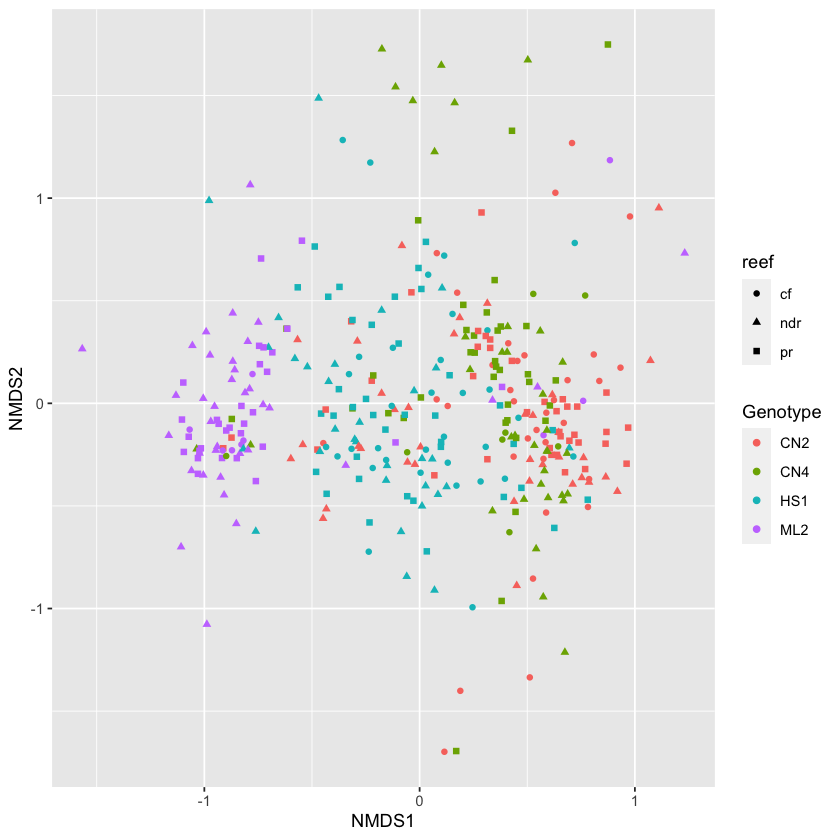

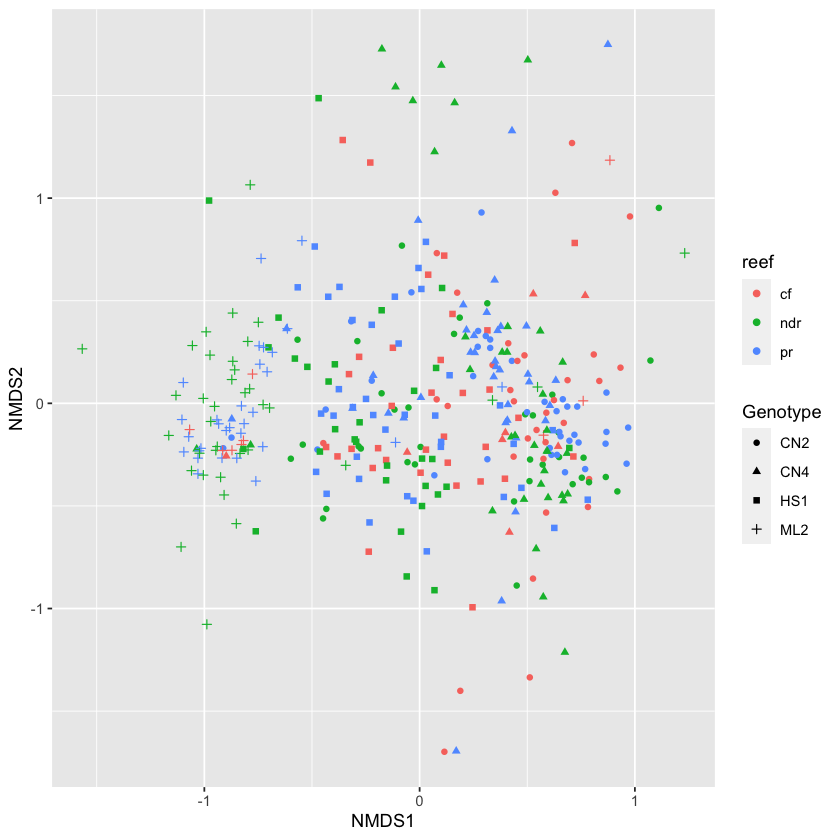

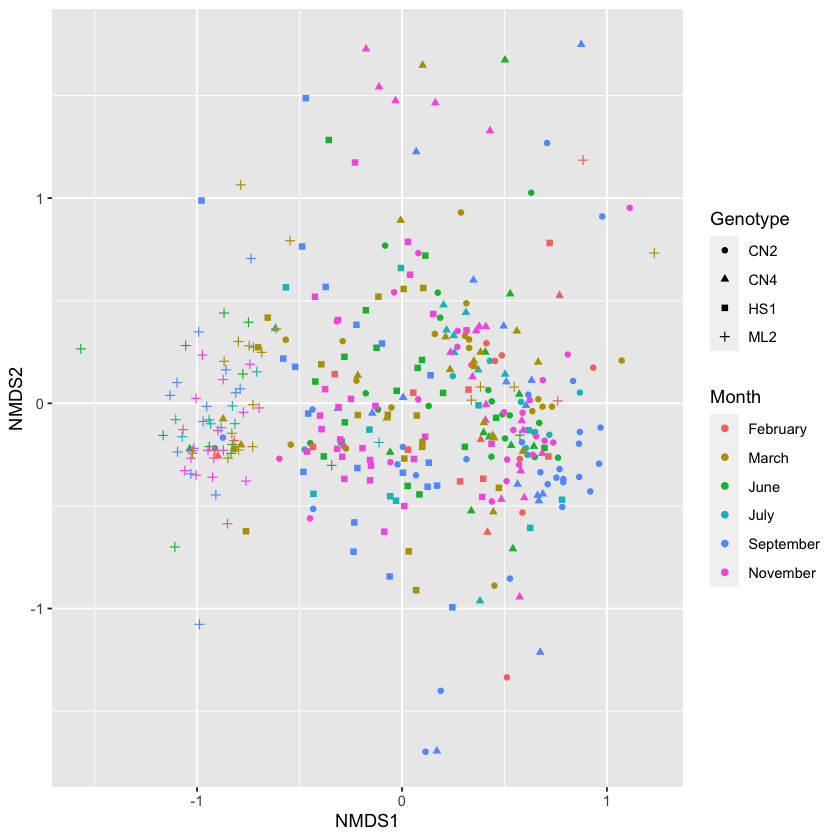

In [140]:
plot_ordination(ps_ra, psr_ra_ord,
                               color="Genotype",
                              shape="reef",
                            axes = c(1,2))


plot_ordination(ps_ra, psr_ra_ord,
                               color="reef",
                              shape="Genotype",
                            axes = c(1,2))


plot_ordination(ps_ra, psr_ra_ord,
                               color="Month",
                              shape="Genotype",
                            axes = c(1,2))


	Homogeneity of multivariate dispersions

Call: betadisper(d = ps_veg, group = sample_data(ps_ra)$Genotype)

No. of Positive Eigenvalues: 137
No. of Negative Eigenvalues: 225

Average distance to median:
   CN2    CN4    HS1    ML2 
0.4278 0.4519 0.4134 0.3638 

Eigenvalues for PCoA axes:
(Showing 8 of 362 eigenvalues)
 PCoA1  PCoA2  PCoA3  PCoA4  PCoA5  PCoA6  PCoA7  PCoA8 
26.630 11.582  7.526  6.171  4.982  4.142  3.405  3.038 

[1] 363   1

,mod$distances
,<dbl>
bagnumber-1009,0.2189952
bagnumber-1010,0.2156217
bagnumber-1011,0.7615171
bagnumber-1013,0.2581734
bagnumber-1014,0.3719411
bagnumber-1015,0.4764038


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = distances ~ group, data = df)

$group
               diff         lwr          upr     p adj
CN4-CN2  0.02405668 -0.03144615  0.079559518 0.6782156
HS1-CN2 -0.01442976 -0.06620776  0.037348246 0.8893794
ML2-CN2 -0.06406110 -0.12040894 -0.007713253 0.0185837
HS1-CN4 -0.03848644 -0.09456409  0.017591206 0.2888420
ML2-CN4 -0.08811778 -0.14844042 -0.027795145 0.0010888
ML2-HS1 -0.04963134 -0.10654546  0.007282782 0.1117905



Permutation test for homogeneity of multivariate dispersions
Permutation: free
Number of permutations: 999

Response: Distances
           Df Sum Sq  Mean Sq      F N.Perm Pr(>F)   
Groups      3 0.3220 0.107331 5.1075    999  0.005 **
Residuals 359 7.5442 0.021014                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Pairwise comparisons:
(Observed p-value below diagonal, permuted p-value above diagonal)
          CN2       CN4       HS1   ML2
CN2           0.2800000 0.4140000 0.009
CN4 0.2666458           0.0650000 0.001
HS1 0.3923348 0.0588882           0.022
ML2 0.0063942 0.0017660 0.0250205      

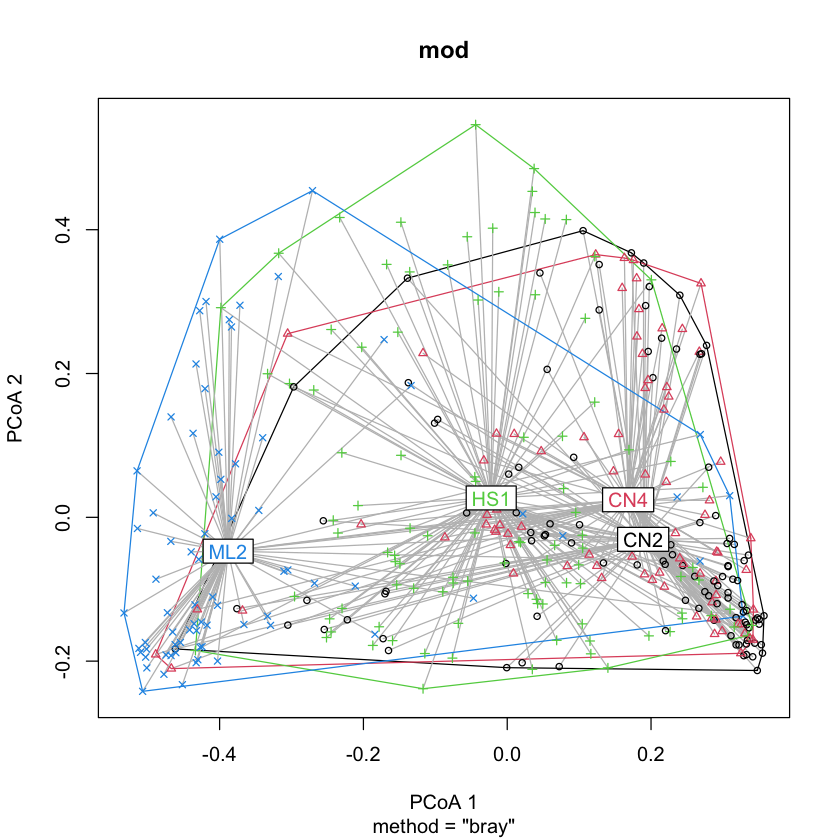

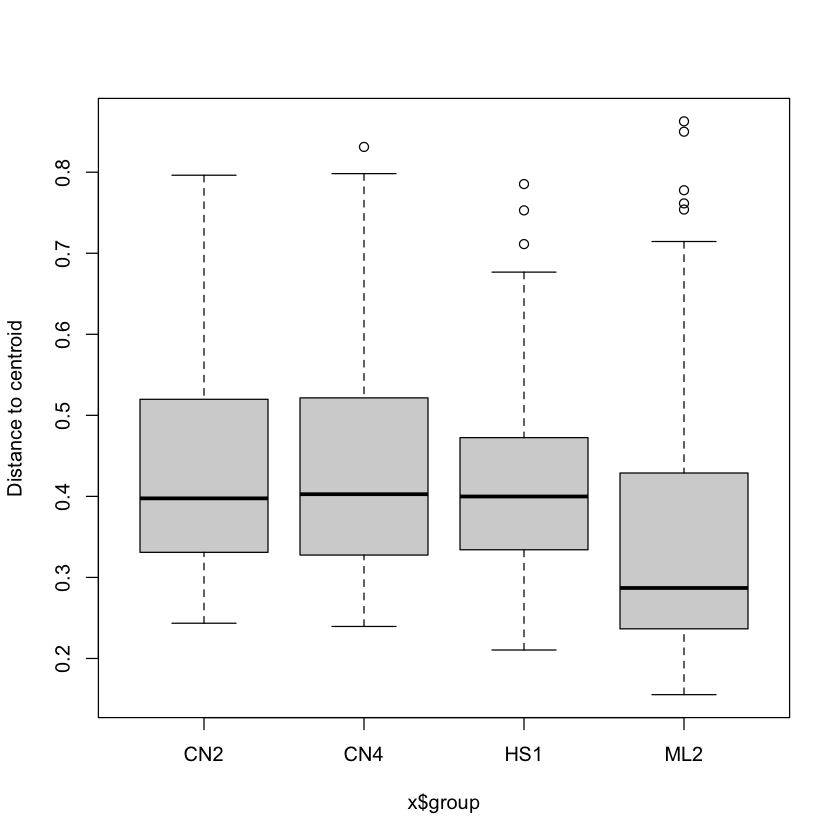

In [144]:
#distances between
ps_veg <- vegdist(otu_table(t(ps_ra)), method ="bray")

mod_geno <- betadisper(ps_veg, sample_data(ps_ra)$Genotype)
#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
mod_geno

mod_dist= as.data.frame(mod$distances)
dim(mod_dist)
mod_dist_df=cbind(sample_data(ps_ra), mod_dist) 
head(mod_dist)
plot(mod)


#test the pair-wise comparisons for Multivariate Homogeneity Of Groups Dispersions (Variances)
TukeyHSD(mod_geno)
permutest(mod_geno, pairwise = TRUE, permutations = 999)
boxplot(mod_geno)

In [164]:
mod_dist_geno= as.data.frame(mod_geno$distances)
dim(mod_dist_geno)
head(mod_dist_geno)

[1] 363   1

,mod_geno$distances
,<dbl>
bagnumber-1009,0.2189952
bagnumber-1010,0.2156217
bagnumber-1011,0.7615171
bagnumber-1013,0.2581734
bagnumber-1014,0.3719411
bagnumber-1015,0.4764038


[1] 363   1

,sample_ID,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,⋯,cluster_latitude,cluster_longitude,cluster_depth,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC,mod_geno$distances
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-1009,apal_cf_gML2_cl78_frB_AH_2019-06-25,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,B,⋯,25.22070,-80.21037,20.9,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.2189952
bagnumber-1010,apal_cf_gML2_cl78_fr3_AH_2019-06-25,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,3,⋯,25.22070,-80.21037,20.9,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.2156217
bagnumber-1011,apal_cf_gML2_cl78_fr4_AH_2019-06-25,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,4,⋯,25.22070,-80.21037,20.9,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.7615171
bagnumber-1013,apal_cf_gCN4_cl35_fr3_AH_2019-06-25,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,3,⋯,25.22078,-80.21029,17.9,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.2581734
bagnumber-1014,apal_cf_gCN4_cl35_fr4_AH_2019-06-25,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,4,⋯,25.22078,-80.21029,17.9,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.3719411
bagnumber-1015,apal_cf_gCN4_cl35_fr5_AH_2019-06-25,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,5,⋯,25.22078,-80.21029,17.9,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.4764038


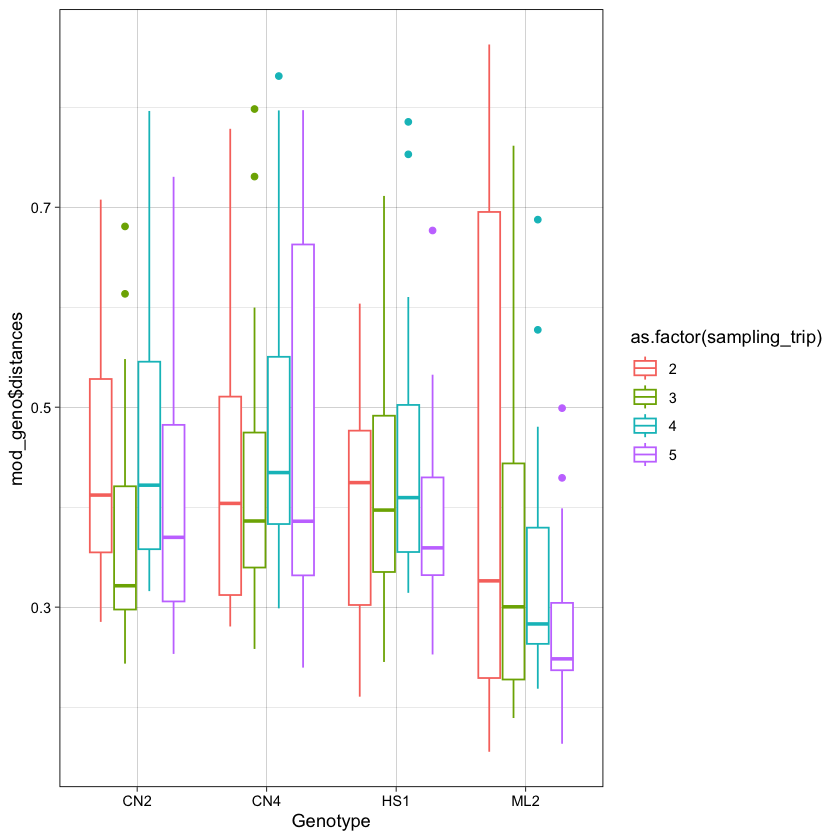

In [170]:
mod_dist_geno= as.data.frame(mod_geno$distances)
dim(mod_dist_geno)

mod_dist_geno_df=cbind(sample_data(ps_ra), mod_dist_geno) 
head(mod_dist_geno_df)



ggplot(mod_dist_geno_df,
       aes(x=Genotype, y=mod_geno$distances)) +
geom_boxplot(aes(color=as.factor(sampling_trip))) +
theme_linedraw() 

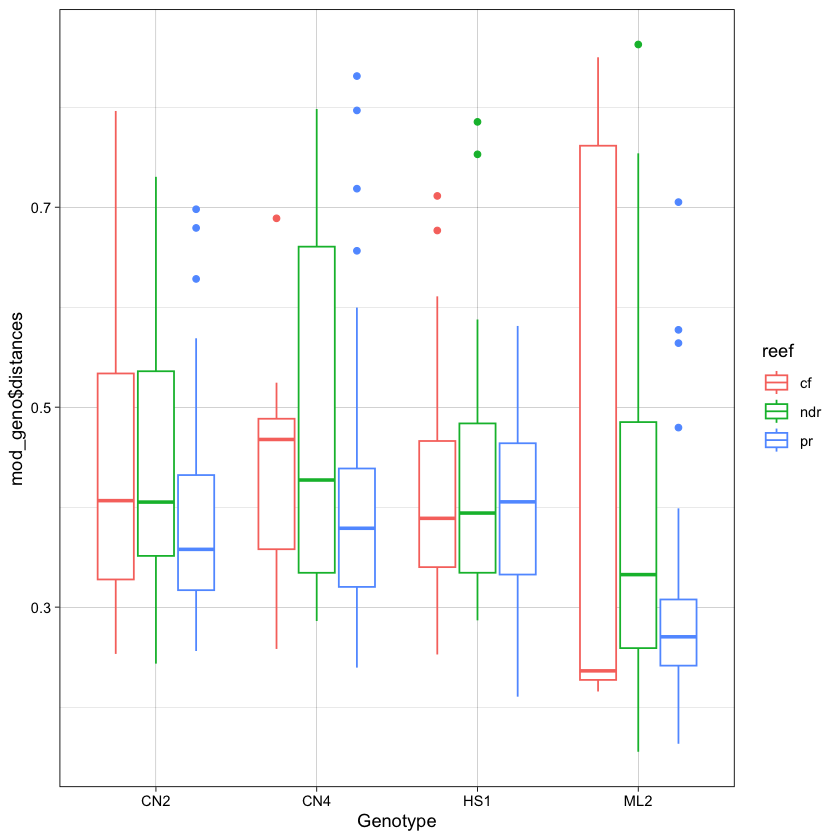

In [171]:
ggplot(mod_dist_geno_df,
       aes(x=Genotype, y=mod_geno$distances)) +
geom_boxplot(aes(color=reef)) +
theme_linedraw() 

In [162]:
dates <- unique(sort(mod_dist_geno_df$collection_date))
mod_dist_geno_df$collection_date <- factor(mod_dist_geno_df$collection_date,labels = dates, ordered = T)

In [158]:
head(mod_dist_geno_df)

,sample_ID,collection_date,Speed.cm.s.,Bearing.degrees.,Velocity.N.cm.s.,Velocity.E.cm.s.,Temperature.C.,reef,Genotype,Fragment_number,⋯,cluster_latitude,cluster_longitude,cluster_depth,Lat_decimal,Long_decimal,avgchla_mgm.3,sdchla_mgm.3,avgSST_degC,sdSST_degC,mod_geno$distances
,<chr>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-1009,apal_cf_gML2_cl78_frB_AH_2019-06-25,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,B,⋯,25.22070,-80.21037,20.9,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.2189952
bagnumber-1010,apal_cf_gML2_cl78_fr3_AH_2019-06-25,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,3,⋯,25.22070,-80.21037,20.9,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.2156217
bagnumber-1011,apal_cf_gML2_cl78_fr4_AH_2019-06-25,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,ML2,4,⋯,25.22070,-80.21037,20.9,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.7615171
bagnumber-1013,apal_cf_gCN4_cl35_fr3_AH_2019-06-25,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,3,⋯,25.22078,-80.21029,17.9,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.2581734
bagnumber-1014,apal_cf_gCN4_cl35_fr4_AH_2019-06-25,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,4,⋯,25.22078,-80.21029,17.9,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.3719411
bagnumber-1015,apal_cf_gCN4_cl35_fr5_AH_2019-06-25,25-Jun-19,4.852118,122.786,0.9382899,3.174028,30.40801,cf,CN4,5,⋯,25.22078,-80.21029,17.9,25.221,-80.21,1.792092,0.3763544,29.63623,0.5081026,0.4764038


`geom_smooth()` using formula = 'y ~ x'


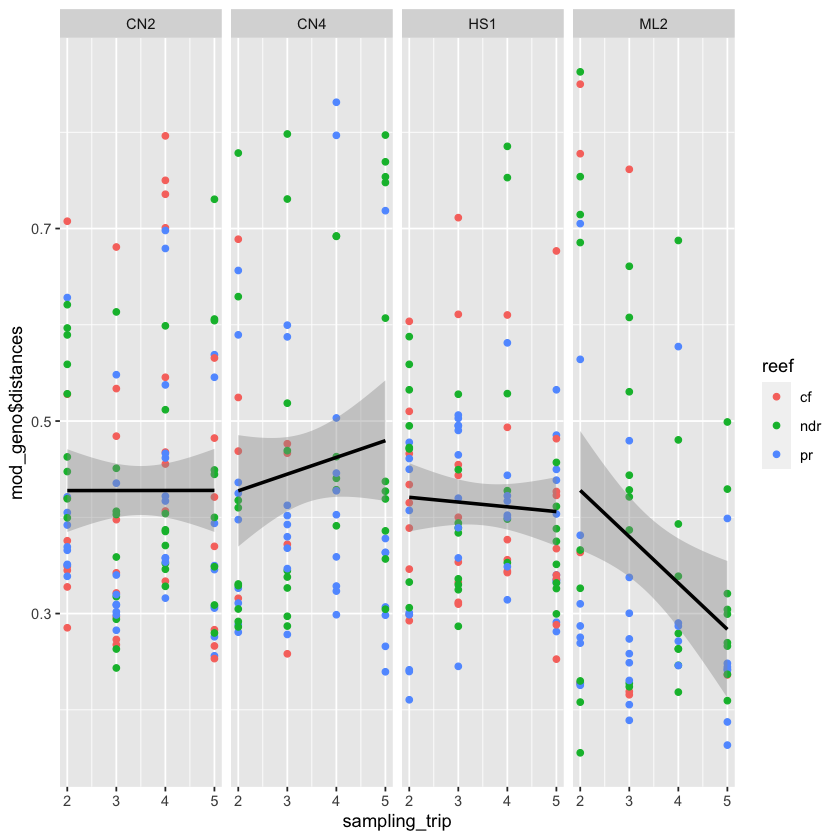

In [174]:
ggplot(mod_dist_geno_df,
       aes(x=sampling_trip, y=mod_geno$distances)) +
geom_point(aes(color=reef)) +
facet_grid(.~Genotype) +
geom_smooth(method='lm', color="black") 

`geom_smooth()` using formula = 'y ~ x'


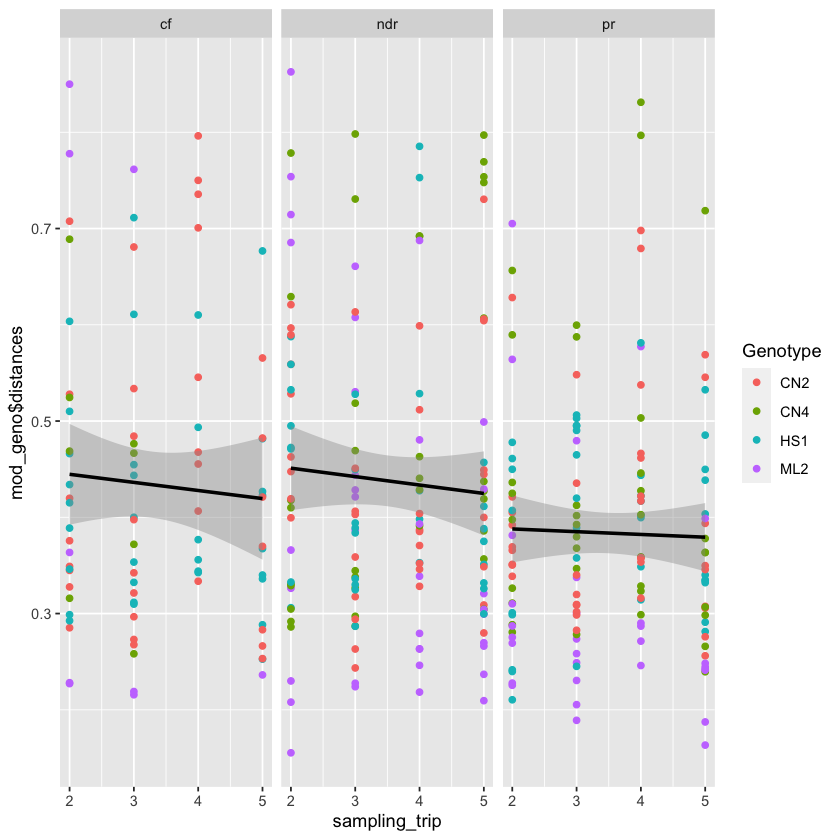

In [176]:
ggplot(mod_dist_geno_df,
       aes(x=sampling_trip, y=mod_geno$distances)) +
geom_point(aes(color=Genotype)) +
facet_grid(.~reef) +
geom_smooth(method='lm', color="black") 

In [213]:
ps_ra_df=as.data.frame(otu_table(ps_ra))
ps_ra_meta= as(sample_data(ps_ra), "data.frame")


In [233]:
str(ps_ra_meta)

'data.frame':	363 obs. of  50 variables:
 $ sample_ID            : chr  "apal_cf_gML2_cl78_frB_AH_2019-06-25" "apal_cf_gML2_cl78_fr3_AH_2019-06-25" "apal_cf_gML2_cl78_fr4_AH_2019-06-25" "apal_cf_gCN4_cl35_fr3_AH_2019-06-25" ...
 $ collection_date      : chr  "25-Jun-19" "25-Jun-19" "25-Jun-19" "25-Jun-19" ...
 $ Speed.cm.s.          : num  4.85 4.85 4.85 4.85 4.85 ...
 $ Bearing.degrees.     : num  123 123 123 123 123 ...
 $ Velocity.N.cm.s.     : num  0.938 0.938 0.938 0.938 0.938 ...
 $ Velocity.E.cm.s.     : num  3.17 3.17 3.17 3.17 3.17 ...
 $ Temperature.C.       : num  30.4 30.4 30.4 30.4 30.4 ...
 $ reef                 : chr  "cf" "cf" "cf" "cf" ...
 $ Genotype             : chr  "ML2" "ML2" "ML2" "CN4" ...
 $ Fragment_number      : chr  "B" "3" "4" "3" ...
 $ Fragment_num         : num  86.5 86.5 86.5 30 30 ...
 $ day                  : int  25 25 25 25 25 25 25 25 25 25 ...
 $ Year                 : int  2019 2019 2019 2019 2019 2019 2019 2019 2019 2019 ...
 $ Survey.        

In [214]:
  p <- pca(ps_ra_df, metadata =ps_ra_meta, 
           removeVar = 0.1)

-- removing the lower 10% of variables based on variance



In [215]:
colnames(ps_ra_meta)

[1] "sample_ID"             "collection_date"       "Speed.cm.s."          
 [4] "Bearing.degrees."      "Velocity.N.cm.s."      "Velocity.E.cm.s."     
 [7] "Temperature.C."        "reef"                  "Genotype"             
[10] "Fragment_number"       "Fragment_num"          "day"                  
[13] "Year"                  "Survey."               "LiveFrag"             
[16] "L"                     "W"                     "H"                    
[19] "Adjusted.Area"         "S01FragCount"          "Si.uM."               
[22] "NO2.uM."               "N.N.uM."               "NO3.uM."              
[25] "PO4.uM."               "sample_ID2"            "Health"               
[28] "Month"                 "Samp_trip"             "joining_info"         
[31] "order"                 "species"               "time_Reef"            
[34] "Cluster"               "sampling_trip"         "X"                    
[37] "colour_reef"           "colour_genotype"       "colour_reef_genotype" 
[40] "colour_timepoint"      "colour_timepoint_reef" "cluster_latitude"     
[43] "cluster_longitude"     "cluster_depth"         "Lat_decimal"          
[46] "Long_decimal"          "avgchla_mgm.3"         "sdchla_mgm.3"         
[49] "avgSST_degC"           "sdSST_degC"

Warning message in eigencorplot(p, metavars = c("Si.uM.", "NO2.uM.", "N.N.uM.", :
“Samp_trip is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Si.uM.", "NO2.uM.", "N.N.uM.", :
“reef is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in eigencorplot(p, metavars = c("Si.uM.", "NO2.uM.", "N.N.uM.", :
“Genotype is not numeric - please check the source data as non-numeric variables will be coerced to numeric”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(xvals[, i], yvals[, j], use = corUSE, method = corFUN):
“Cannot compute exact p-value with ties”
Warning message in cor.test.def

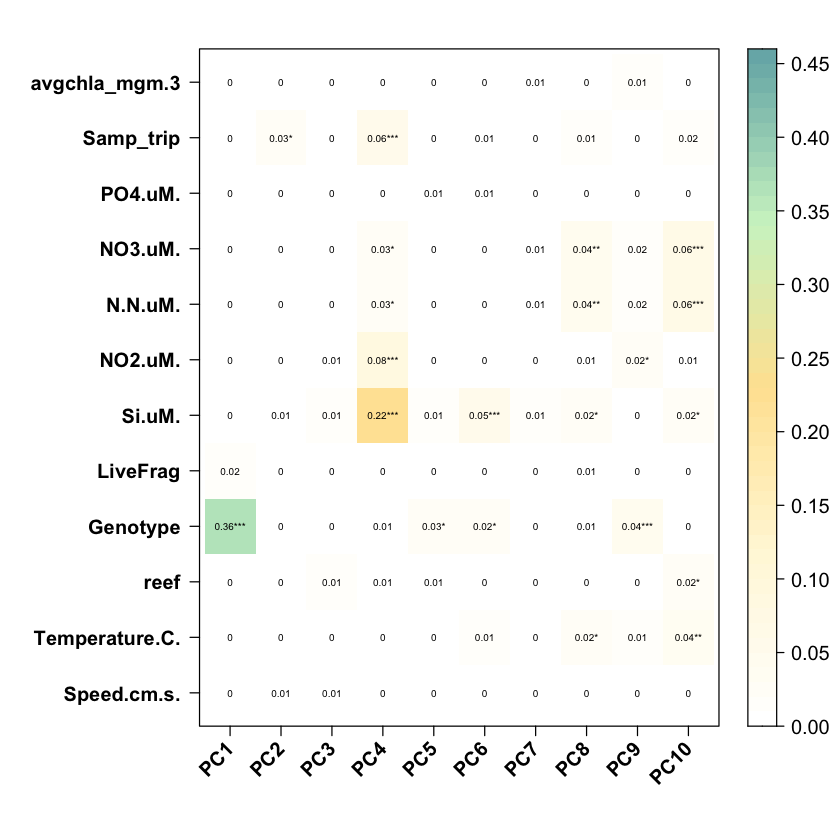

In [240]:
 eigencorplot(p,
    metavars = c('Si.uM.', 'NO2.uM.', 'N.N.uM.', 'NO3.uM.', 'PO4.uM.', "Samp_trip", "avgchla_mgm.3", "reef", "Genotype",
                "Speed.cm.s.", "Temperature.C.",
                "LiveFrag"),
              col = c('white', 'cornsilk1', "#FFE4A1",  '#CFF3CA', "#77B3B5"),
    cexCorval = 0.5,
    fontCorval = 0.5,
    cexTitleX = 4,
    
    #posLab = 'all',
    rotLabX = 45,
    scale = TRUE,
    plotRsquared = TRUE,
    corFUN = 'spearman',
    corUSE = 'pairwise.complete.obs',
    corMultipleTestCorrection = 'BH')

In [302]:
meta_envs= meta %>%
select("Genotype",'NO2.uM.', 'N.N.uM.', 'NO3.uM.', 'PO4.uM.', 'Si.uM.', "Samp_trip", "reef",
                "Speed.cm.s.", "Temperature.C.",
                "LiveFrag")
head(meta_envs, n=2)

,Genotype,NO2.uM.,N.N.uM.,NO3.uM.,PO4.uM.,Si.uM.,Samp_trip,reef,Speed.cm.s.,Temperature.C.,LiveFrag
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
bagnumber-584,CN2,0.015,0.729,0.714,0.037,0.504,Trip_2,pr,5.331549,26.09619,1
bagnumber-590,CN2,0.015,0.729,0.714,0.037,0.504,Trip_2,pr,5.331549,26.09619,1


In [280]:
library("GGally")

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



Warning message in ggcorr(meta_envs, geom = "circle", nbreaks = 5):
“data in column(s) 'Samp_trip', 'reef', 'Genotype' are not numeric and were ignored”


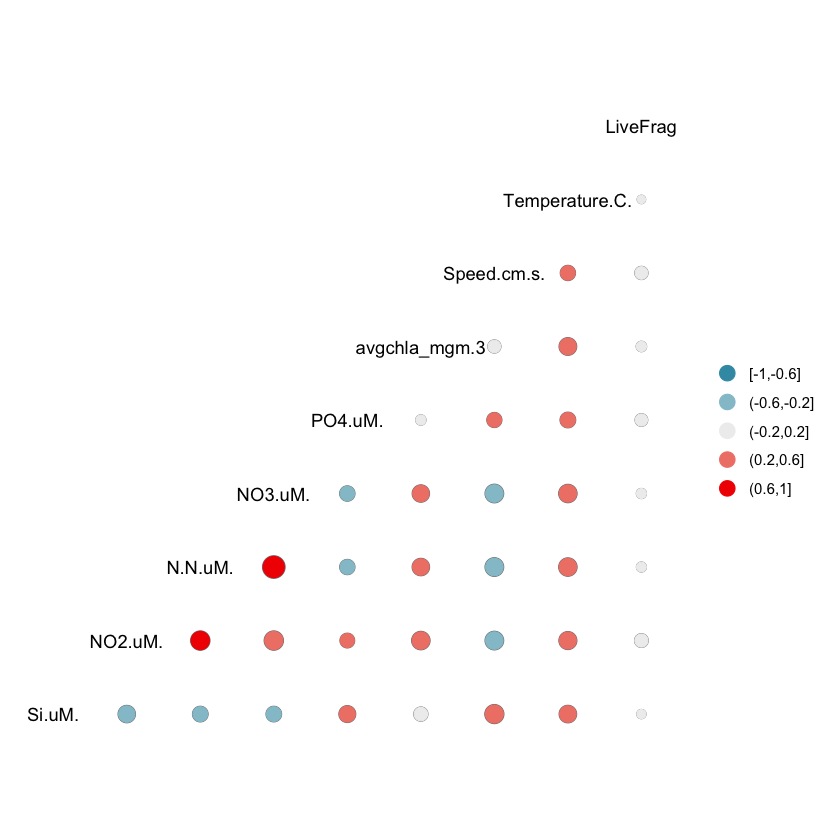

In [282]:
ggcorr(meta_envs, geom = "circle", nbreaks = 5)

In [303]:

#  adonis(formula = abund_table ~ ., data = meta_table) 

adonis2(ps_veg~., 
       data =meta_envs, 
         method = "bray", permutations = 999)

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Genotype,3,1.1046494,0.012691185,1.680374,0.024
NO2.uM.,1,0.5495205,0.006313375,2.507764,0.017
N.N.uM.,1,1.9867438,0.022825462,9.066604,0.001
NO3.uM.,1,0.4814194,0.005530970,2.196982,0.032
PO4.uM.,1,1.2029955,0.013821072,5.489930,0.001
Si.uM.,1,1.1165303,0.012827683,5.095342,0.001
Samp_trip,3,2.3082670,0.026519404,3.511297,0.001
reef,2,1.7235027,0.019801116,3.932645,0.001
Speed.cm.s.,1,0.2973724,0.003416476,1.357074,0.201


In [301]:
adonis2(ps_veg~Genotype, 
       data =ps_ra_meta, permutations = 999, 
         method = "bray")

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Genotype,3,16.97380,0.19501,28.98942,0.001
Residual,359,70.06688,0.80499,NA,NA
Total,362,87.04068,1.00000,NA,NA
